# Initial Setup

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

Import Processed data as Samples

In [2]:
samples = pd.read_csv("data/processed/samples.csv", encoding="latin-1")

In [3]:
samples = samples.drop("Unnamed: 0", axis=1)
samples.head()

establishments  employees  growth  exemptions_stay  exemptions_in_is  \
0              35        157   False          35901.0            2185.0   
1              34        175   False          36850.0            2519.0   
2              30        109    True          37767.0            2394.0   
3              38        116   False          39518.0            2548.0   
4              37          0   False          40719.0            2230.0   

   exemptions_in_oos  exemptions_out_is  exemptions_out_oos  returns_stay  \
0             4184.0             1883.0              3338.0       15062.0   
1             4209.0             2102.0              3545.0       15473.0   
2             4168.0             2127.0              3443.0       15944.0   
3             3863.0             2047.0              3601.0       16791.0   
4             3873.0             2118.0              3660.0       17385.0   

   returns_in_is  returns_in_oos  returns_out_is  returns_out_oos  agi_stay  \
0          951.0          1410.0           853.0           1245.0  714261.0   
1         1139.0          1551.0           971.0           1307.0  756692.0   
2         1072.0          1447.0          1025.0           1284.0  827611.0   
3         1185.0          1458.0           989.0           1398.0  901200.0   
4         1038.0          1462.0          1018.0           1375.0  936888.0   

   agi_in_is  agi_in_oos  agi_out_is  agi_out_oos  
0    32399.0     73510.0     26576.0      59705.0  
1    38883.0     82027.0     31657.0      70658.0  
2    37153.0     79737.0     36112.0      67092.0  
3    43332.0     83366.0     34063.0      69089.0  
4    36050.0     79697.0     34539.0      75861.0

Split off a hold-out test set of data

In [4]:
y = samples["growth"]
X = samples.drop("growth", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=36)

# Models
## Model 1: Logistic Regression

In [5]:
# define steps and hyperparameter ranges
steps = [("scaler", preprocessing.StandardScaler()),
        ("pca", PCA()),
        ("model", LogisticRegression())]
parameters = {"pca__n_components":np.arange(1,18)}

In [6]:
# create pipeline and train model
pipeline = Pipeline(steps)
cv = GridSearchCV(pipeline, parameters)
cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)

In [7]:
# score the model
print("Best Score:", cv.score(X_test, y_test))
print("Best Params:", cv.best_params_)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Best Score: 0.652959898154
Best Params: {'pca__n_components': 16}
Classification Report:
             precision    recall  f1-score   support

      False       0.66      0.97      0.78      5044
       True       0.60      0.09      0.16      2811

avg / total       0.64      0.65      0.56      7855



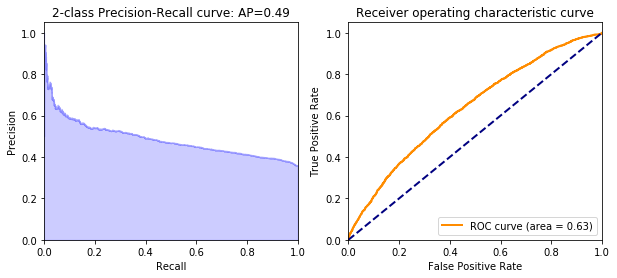

In [8]:
#more statistics to compute for graphing
y_score = cv.decision_function(X_test)
precision, recall, _ = precision_recall_curve(y_test, y_score)
average_precision = average_precision_score(y_test, y_score)
fpr, tpr, thresholds = roc_curve(y_test, y_score, pos_label=1)


#plot precision-recall curve and receiver operating characteristic
plt.figure(figsize=(10,4))
plt.subplot(121)  # 1 row, 2 columns, Plot 1
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

plt.subplot(122)  # 1 row, 2 columns, Plot 2
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show()

## Model 2: Nearest Neighbors

In [9]:
# define steps and hyperparameter ranges
steps = [("scaler", preprocessing.StandardScaler()),
        ("pca", PCA()),
        ("model", KNeighborsClassifier())]
parameters = {"pca__n_components":np.arange(1,18),
             "model__n_neighbors":np.arange(1,10)}

In [10]:
# create pipeline and train model
pipeline = Pipeline(steps)
cv = GridSearchCV(pipeline, parameters)
cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)

In [11]:
#score the model
y_pred = cv.predict(X_test)
print("Best Score:", cv.score(X_test, y_test))
print("Best Params:", cv.best_params_)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Best Score: 0.624188415022
Best Params: {'model__n_neighbors': 8, 'pca__n_components': 4}
Classification Report:
             precision    recall  f1-score   support

      False       0.66      0.87      0.75      5044
       True       0.44      0.18      0.26      2811

avg / total       0.58      0.62      0.57      7855



In [13]:
y_pred

array([False, False, False, ..., False, False, False], dtype=bool)

In [12]:
#more statistics to compute for graphing
y_score = cv.decision_function(X_test)
precision, recall, _ = precision_recall_curve(y_test, y_score)
average_precision = average_precision_score(y_test, y_score)
fpr, tpr, thresholds = roc_curve(y_test, y_score, pos_label=1)


#plot precision-recall curve and receiver operating characteristic
plt.figure(figsize=(10,4))
plt.subplot(121)  # 1 row, 2 columns, Plot 1
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

plt.subplot(122)  # 1 row, 2 columns, Plot 2
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show()

AttributeError: 'KNeighborsClassifier' object has no attribute 'decision_function'

## Model 3: Naive Bayes

In [ ]:
# define steps and hyperparameter ranges
steps = [("scaler", preprocessing.StandardScaler()),
        ("pca", PCA()),
        ("model", GaussianNB())]
parameters = {"pca__n_components":np.arange(1,18)}

In [ ]:
# create pipeline and train model
pipeline = Pipeline(steps)
cv = GridSearchCV(pipeline, parameters)
cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)

In [ ]:
#score the model
y_pred = cv.predict(X_test)
print("Best Score:", cv.score(X_test, y_test))
print("Best Params:", cv.best_params_)
print("Classification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
#more statistics to compute for graphing
y_score = cv.decision_function(X_test)
precision, recall, _ = precision_recall_curve(y_test, y_score)
average_precision = average_precision_score(y_test, y_score)
fpr, tpr, thresholds = roc_curve(y_test, y_score, pos_label=1)


#plot precision-recall curve and receiver operating characteristic
plt.figure(figsize=(10,4))
plt.subplot(121)  # 1 row, 2 columns, Plot 1
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

plt.subplot(122)  # 1 row, 2 columns, Plot 2
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show()

## Model 4: Random Forest

In [ ]:
# define steps and hyperparameter ranges
steps = [("scaler", preprocessing.StandardScaler()),
        ("pca", PCA()),
        ("model", RandomForestClassifier())]
parameters = {"pca__n_components":np.arange(10,18),
             "model__n_estimators":[50],
             "model__max_features":["sqrt", "log2"],
             "model__min_samples_leaf":[20, 30, 40]}

In [ ]:
# create pipeline and train model
pipeline = Pipeline(steps)
cv = GridSearchCV(pipeline, parameters)
cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)

In [ ]:
#score the model
y_pred = cv.predict(X_test)
print("Best Score:", cv.score(X_test, y_test))
print("Best Params:", cv.best_params_)
print("Classification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
#more statistics to compute for graphing
y_score = cv.decision_function(X_test)
precision, recall, _ = precision_recall_curve(y_test, y_score)
average_precision = average_precision_score(y_test, y_score)
fpr, tpr, thresholds = roc_curve(y_test, y_score, pos_label=1)


#plot precision-recall curve and receiver operating characteristic
plt.figure(figsize=(10,4))
plt.subplot(121)  # 1 row, 2 columns, Plot 1
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

plt.subplot(122)  # 1 row, 2 columns, Plot 2
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show()

## Model 5: Support Vector Machine

In [ ]:
# define steps and hyperparameter ranges
steps = [("scaler", preprocessing.StandardScaler()),
        ("pca", PCA()),
        ("model", SVC())]
parameters = {"pca__n_components":np.arange(10,18),
             "model__C":[0.01, 0.1, 1, 10]}

In [ ]:
# create pipeline and train model
pipeline = Pipeline(steps)
cv = GridSearchCV(pipeline, parameters)
cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)

In [ ]:
#score the model
y_pred = cv.predict(X_test)
print("Best Score:", cv.score(X_test, y_test))
print("Best Params:", cv.best_params_)
print("Classification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
#more statistics to compute for graphing
y_score = cv.decision_function(X_test)
precision, recall, _ = precision_recall_curve(y_test, y_score)
average_precision = average_precision_score(y_test, y_score)
fpr, tpr, thresholds = roc_curve(y_test, y_score, pos_label=1)


#plot precision-recall curve and receiver operating characteristic
plt.figure(figsize=(10,4))
plt.subplot(121)  # 1 row, 2 columns, Plot 1
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

plt.subplot(122)  # 1 row, 2 columns, Plot 2
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show()

# Intepretation